Prepare Datasets

In [2]:
from sklearn.datasets import fetch_openml

x, y = fetch_openml('mnist_784',data_home='./dataset/mnist',return_X_y=True)
x.shape

(70000, 784)

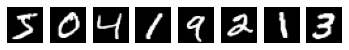

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

x = np.array(x)
y = np.array(y)
pos = 1
for data in x[:8]:
  plt.subplot(1,8,pos)
  plt.imshow(data.reshape((28,28)), cmap=cm.Greys_r)
  plt.axis("off")
  pos += 1

plt.show()

In [4]:
y[:8]

array(['5', '0', '4', '1', '9', '2', '1', '3'], dtype=object)

In [5]:
# High Datasets
x_train = x[:60000]
y_train = y[:60000]
x_test = x[60000:]
y_test = y[60000:]

# Low Datasets
# x_train = x[:1000]
# y_train = y[:1000]
# x_test = x[69000:]
# y_test = y[69000:]

Training Classification dengan SVC (Support Vector Classifier)

In [ ]:
from sklearn.svm import SVC

model = SVC(random_state=0)
model.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

Hyperparameter Tuning dengan GridSearhCV

In [7]:
from sklearn.model_selection import Grid

parameters = {
    'kernel' : ['rbf','poly', 'sigmoid'],
    'C' : [0.5,1,10,100],
    'gamma' : ['scale', 1,0.1,0.01,0.001]
}

grid_search = GridSearchCV(estimator=SVC(random_state=0),
                           param_grid=parameters,
                           n_jobs=12,
                           verbose=1,
                           scoring='accuracy')

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: ignored

In [ ]:
print('Best Score', grid_search.best_score_)

best_params = grid_search.best_estimator_.get_params()
print("Best Parameters:")
for param in parameters:
  print(param,":",best_params[param])

Predict & Evaluate

In [ ]:
y_pred = grid_search.predict(x_test)

print(classification_report(y_test,y_pred))